# Setup

In [2]:
# import necessary packages
import pandas as pd
import numpy as np
import utils.plot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from utils.model import get_cleaned_data, extract_train, split_train_test
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, f1_score

# Explore Data

In [3]:
data = get_cleaned_data("data/kickstarter_projects.csv")
df = extract_train(data)
df.head(2)

,id,name,category,subcategory,country,launched,deadline,goal,pledged,backers,state
353102,271626764,EGGO Resin Toy,Art,Sculpture,United States,2017-07-24 15:02:36,2017-08-31,1500,1735,36,Successful
128772,625033240,Keep Chelsea Davis on the streets.... and Art ...,Art,Painting,Canada,2014-02-11 01:35:59,2014-03-13,225,725,16,Successful


In [4]:
df.shape

(281139, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281139 entries, 353102 to 121958
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           281139 non-null  int64 
 1   name         281139 non-null  object
 2   category     281139 non-null  object
 3   subcategory  281139 non-null  object
 4   country      281139 non-null  object
 5   launched     281139 non-null  object
 6   deadline     281139 non-null  object
 7   goal         281139 non-null  int64 
 8   pledged      281139 non-null  int64 
 9   backers      281139 non-null  int64 
 10  state        281139 non-null  object
dtypes: int64(4), object(7)
memory usage: 25.7+ MB


In [6]:
df.describe()

,id,goal,pledged,backers
count,2.811390e+05,2.811390e+05,2.811390e+05,281139.000000
mean,1.074922e+09,4.529632e+04,9.209317e+03,106.786227
std,6.194567e+08,1.127998e+06,9.678989e+04,934.476143
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000
25%,5.376774e+08,2.000000e+03,3.100000e+01,2.000000
50%,1.075885e+09,5.500000e+03,6.240000e+02,12.000000
75%,1.611358e+09,1.600000e+04,4.057000e+03,57.000000
max,2.147476e+09,1.513959e+08,2.033899e+07,219382.000000


In [7]:
df.isna().sum()

id             0
name           0
category       0
subcategory    0
country        0
launched       0
deadline       0
goal           0
pledged        0
backers        0
state          0
dtype: int64

In [8]:
#Check unique values of categorical variables
print("\n\n", df.category.nunique(), "Unique values of Category : \n", pd.DataFrame({'Count': df.category.value_counts(), 'Percentage : ': round(df.category.value_counts(normalize=True)*100,1)}))
print("\n\n", df.subcategory.nunique(), "Unique values of Sub-Category : \n", pd.DataFrame({'Count': df.subcategory.value_counts(), 'Percentage : ': round(df.subcategory.value_counts(normalize=True)*100,1)}))
print("\n\n", df.country.nunique(), "Unique values of Country : \n", pd.DataFrame({'Count': df.country.value_counts(), 'Percentage : ': round(df.country.value_counts(normalize=True)*100,1)}))
print("\n\n", df.state.nunique(), "Unique values of State : \n", pd.DataFrame({'Count': df.state.value_counts(), 'Percentage : ': round(df.state.value_counts(normalize=True)*100,1)}))



 15 Unique values of Category : 
               Count  Percentage : 
category                          
Film & Video  47269           16.8
Music         37057           13.2
Publishing    29621           10.5
Games         26437            9.4
Technology    24433            8.7
Design        22558            8.0
Art           21027            7.5
Food          18272            6.5
Fashion       17092            6.1
Theater        8207            2.9
Comics         8076            2.9
Photography    8065            2.9
Crafts         6584            2.3
Journalism     3591            1.3
Dance          2850            1.0


 159 Unique values of Sub-Category : 
                  Count  Percentage : 
subcategory                          
Product Design   16755            6.0
Documentary      12176            4.3
Tabletop Games   10676            3.8
Music             9931            3.5
Shorts            9397            3.3
...                ...            ...
Residencies         47  

In [9]:
# check duplicate names
 
# Count occurrences of each name
name_counts = df['name'].value_counts()

# Create DataFrame from the counts
counts_df = pd.DataFrame({'name': name_counts.index, 'count': name_counts.values})
 
# Sort by descending count and ascending name
sorted_df = counts_df.sort_values(by=['count', 'name'], ascending=[False, True])

# Filter rows with count greater than 1
filtered_df = sorted_df[sorted_df['count'] > 1]

# Create a list to store results
result_data = []

# Loop through each duplicate name
for name in filtered_df['name']:
    # Filter the original DataFrame to get 'launched' and 'state' values for the current name
    name_df = df[df['name'] == name]
    sorted_name_df = name_df.sort_values(by='launched', ascending=True)  # Sort by 'launched' in descending order
    dates_launched = sorted_name_df['launched'].tolist()
    states = sorted_name_df['state'].tolist()
    countries = sorted_name_df['country'].tolist()
    categories = sorted_name_df['category'].tolist()
    goals = sorted_name_df['goal'].tolist()
    # Append the name, count, 'launched', and 'state' values to the result_data list
    result_data.append({'name': name, 'count': filtered_df.loc[filtered_df['name'] == name, 'count'].iloc[0], 'launched': dates_launched, 'states': states, 'countries': countries, 'categories': categories, 'goals': goals})

# Create a DataFrame from the result_data list
result_df = pd.DataFrame(result_data)
print(result_df)
#result_df.to_csv('duplicate_names/duplicate_names.csv', index=False)

                                 name  count   
0                 Canceled (Canceled)     13  \
1                      N/A (Canceled)     11   
2                         Music Video      8   
3                         The Journey      8   
4            New EP/Music Development      7   
...                               ...    ...   
1380                 noparkticket.com      2   
1381               project (Canceled)      2   
1382                      sFTP Client      2   
1383                         smartLED      2   
1384  weSTAND: A Stand With a Mission      2   

                                               launched   
0     [2009-10-25 21:30:47, 2014-01-21 22:56:40, 201...  \
1     [2012-03-07 23:11:47, 2013-05-17 03:11:38, 201...   
2     [2011-06-22 00:41:30, 2012-03-09 22:02:48, 201...   
3     [2013-04-04 16:00:02, 2014-06-16 20:36:47, 201...   
4     [2015-03-18 16:10:38, 2015-03-18 16:20:34, 201...   
...                                                 ...   
1380      

# Visualise Data

In [10]:
# Correlation heatmap 
#correlations = df.corr()
#correlations

#mask = np.triu(correlations)
#sns.heatmap(correlations , vmax=1, vmin=-1, annot=True, cmap="YlGnBu");

In [11]:
#sns.pairplot(df, hue="state", height=3,corner=True);

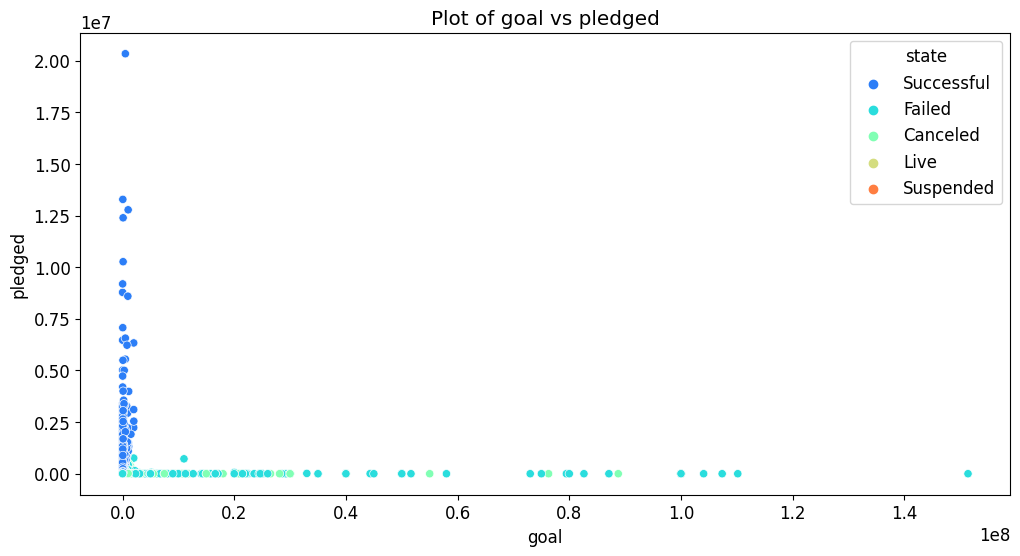

In [12]:
plot.scatter(df ,'goal', 'pledged', 'state', "goal", "pledged")
#Higher goals are Cancelled or Unsucessful

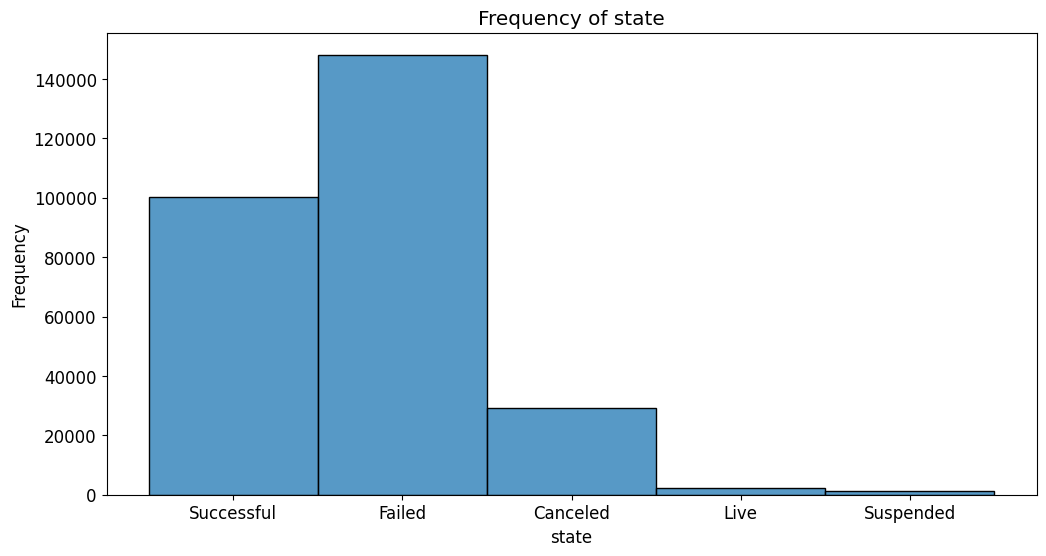

In [13]:
plot.histogram(df,'state', 'state')

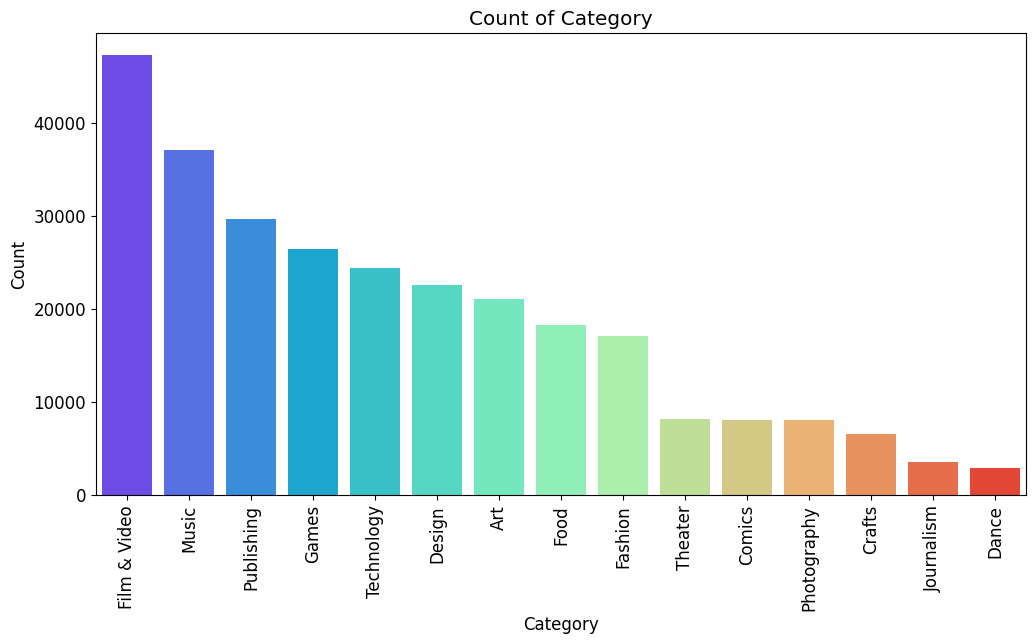

In [14]:
# explore categories split
plot.countplot(df, x="category", xtitle="Category")

In [15]:
pd.set_option('display.max_rows', None)
pd.crosstab(df['subcategory'], df['category'])

category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
subcategory,,,,,,,,,,,,,,,
3D Printing,0,0,0,0,0,0,0,0,0,0,0,0,0,499,0
Academic,0,0,0,0,0,0,0,0,0,0,0,0,679,0,0
Accessories,0,0,0,0,0,2363,0,0,0,0,0,0,0,0,0
Action,0,0,0,0,0,0,558,0,0,0,0,0,0,0,0
Animals,0,0,0,0,0,0,0,0,0,0,0,182,0,0,0
Animation,0,0,0,0,0,0,1912,0,0,0,0,0,0,0,0
Anthologies,0,332,0,0,0,0,0,0,0,0,0,0,283,0,0
Apparel,0,0,0,0,0,5396,0,0,0,0,0,0,0,0,0
Apps,0,0,0,0,0,0,0,0,0,0,0,0,0,4745,0


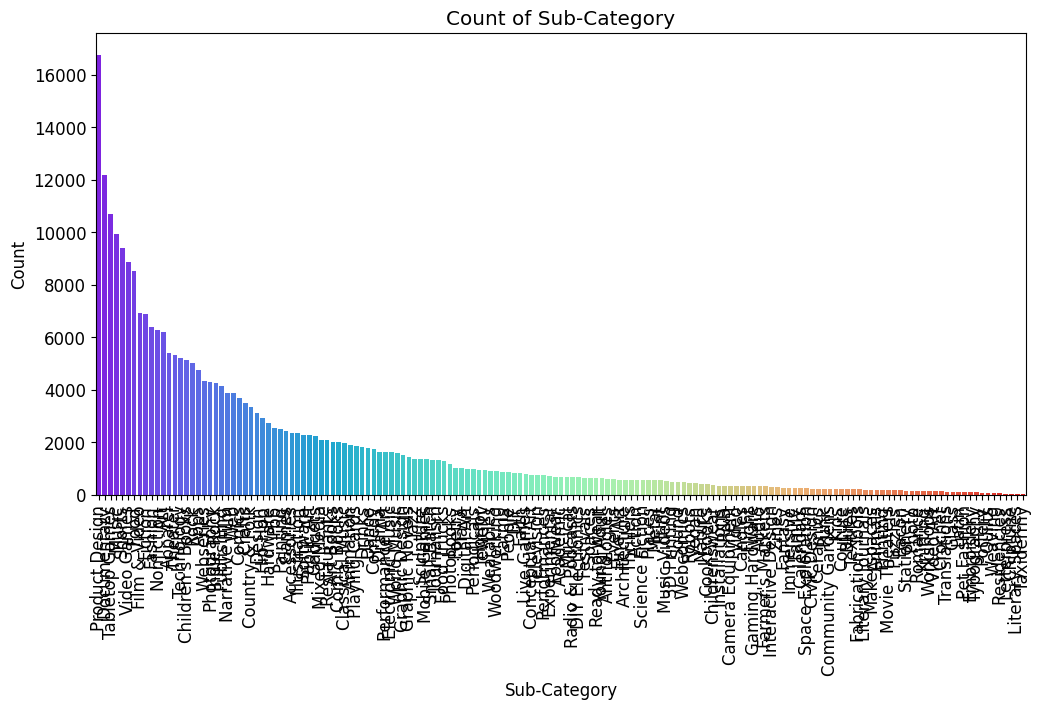

In [16]:
# explore categories split
plot.countplot(df, x="subcategory", xtitle="Sub-Category")

In [17]:
# Create a crosstab
pd.crosstab(df['category'], df['state'])

state,Canceled,Failed,Live,Successful,Suspended
category,,,,,
Art,1648,10587,150,8566,76
Comics,628,3030,61,4338,19
Crafts,644,4232,57,1596,55
Dance,129,948,15,1748,10
Design,3113,11116,232,7922,175
Fashion,1999,10597,184,4208,104
Film & Video,4412,24743,239,17786,89
Food,1621,11876,133,4525,117
Games,4645,11999,223,9393,177


Chi-square statistic: 15951.893711623585
P-value: 0.0
Degrees of freedom: 56


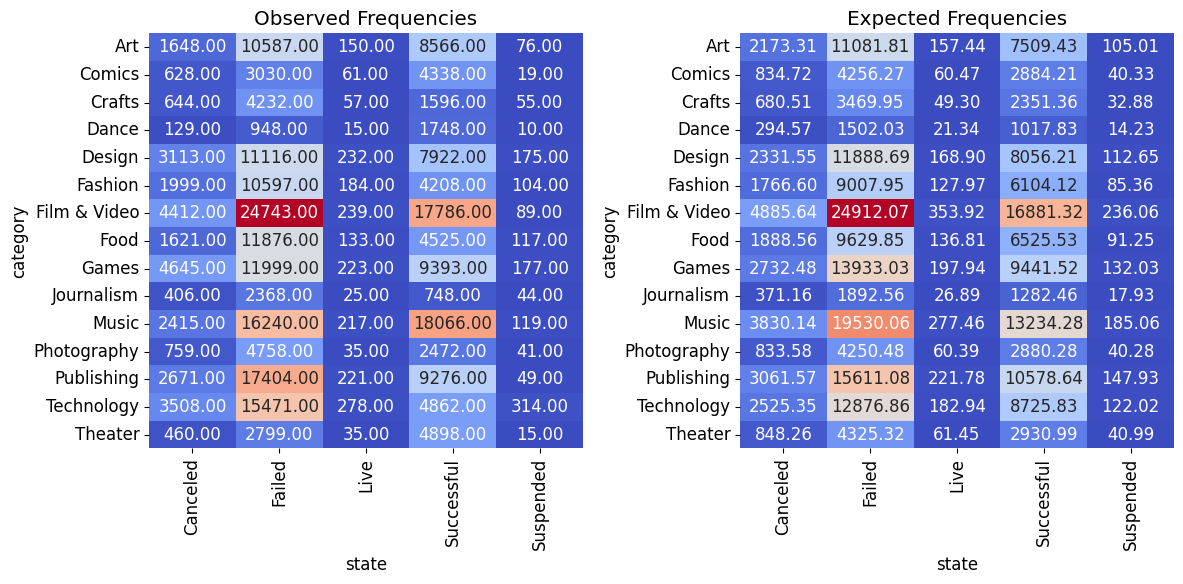

In [18]:
from scipy.stats import chi2_contingency
# Create a crosstab
crosstab = pd.crosstab(df['category'], df['state'])

# Perform chi-square test
chi2, p, dof, ex = chi2_contingency(crosstab)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
#print("Expected frequencies:", ex)

# Convert expected frequencies to DataFrame for easier plotting
expected_df = pd.DataFrame(ex, index=crosstab.index, columns=crosstab.columns)

# Format annotations to avoid scientific notation
def format_annotation(val):
    return f"{val:.2f}"

# Plot the observed frequencies
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(crosstab, annot=crosstab.applymap(format_annotation), fmt='', cmap='coolwarm', cbar=False)
plt.title('Observed Frequencies')

# Plot the expected frequencies
plt.subplot(1, 2, 2)
sns.heatmap(expected_df, annot=expected_df.applymap(format_annotation), fmt='', cmap='coolwarm', cbar=False)
plt.title('Expected Frequencies')

plt.tight_layout()
plt.show()

state           Canceled  Failed  Live  Successful  Suspended   Total   
country                                                                 
Australia            788    3453    58        1523         64    5886  \
Austria               74     280    13          78          6     451   
Belgium               55     284     7         113          7     466   
Canada              1596    6193    99        3098         83   11069   
Denmark              124     433     9         277          9     852   
France               256    1193    40         685         13    2187   
Germany              483    1838    59         719         34    3133   
Hong Kong             66     193    25         156         14     454   
Ireland               77     356     7         153          3     596   
Italy                297    1448    61         333         19    2158   
Japan                  8      11     7           4          0      30   
Luxembourg             2      31     1          13 

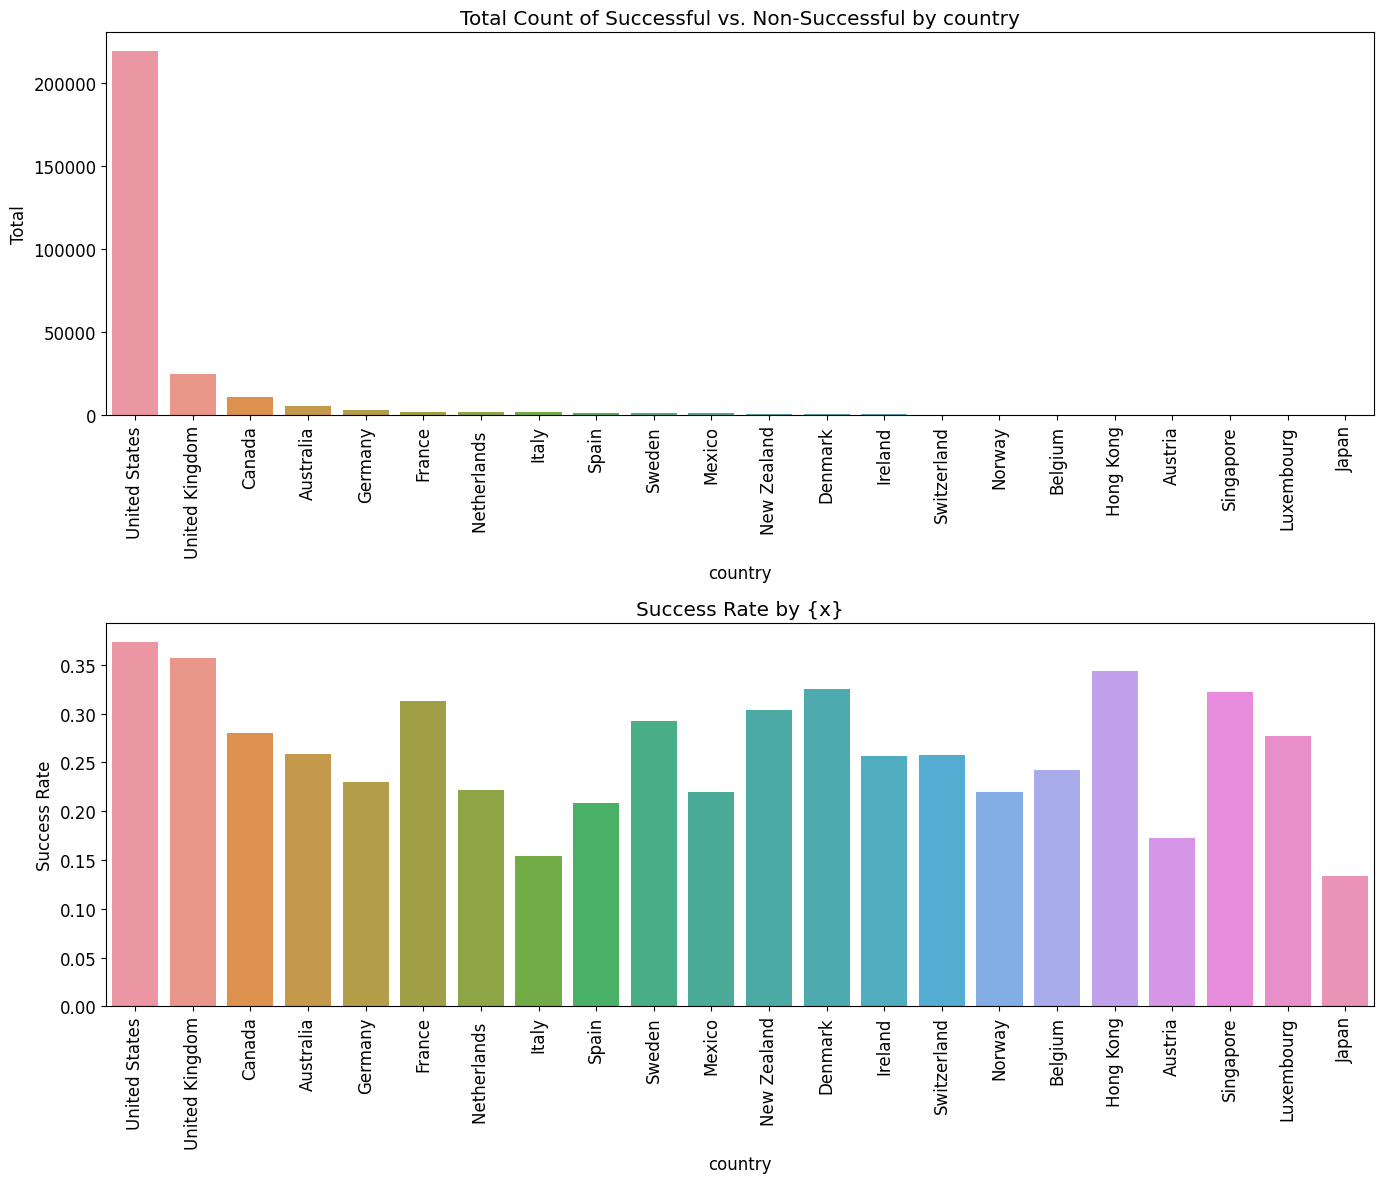

In [19]:
plot.bar_count_percent(df, 'country', 'state')

state         Canceled  Failed  Live  Successful  Suspended  Total   
category                                                             
Art               1648   10587   150        8566         76  21027  \
Comics             628    3030    61        4338         19   8076   
Crafts             644    4232    57        1596         55   6584   
Dance              129     948    15        1748         10   2850   
Design            3113   11116   232        7922        175  22558   
Fashion           1999   10597   184        4208        104  17092   
Film & Video      4412   24743   239       17786         89  47269   
Food              1621   11876   133        4525        117  18272   
Games             4645   11999   223        9393        177  26437   
Journalism         406    2368    25         748         44   3591   
Music             2415   16240   217       18066        119  37057   
Photography        759    4758    35        2472         41   8065   
Publishing        26

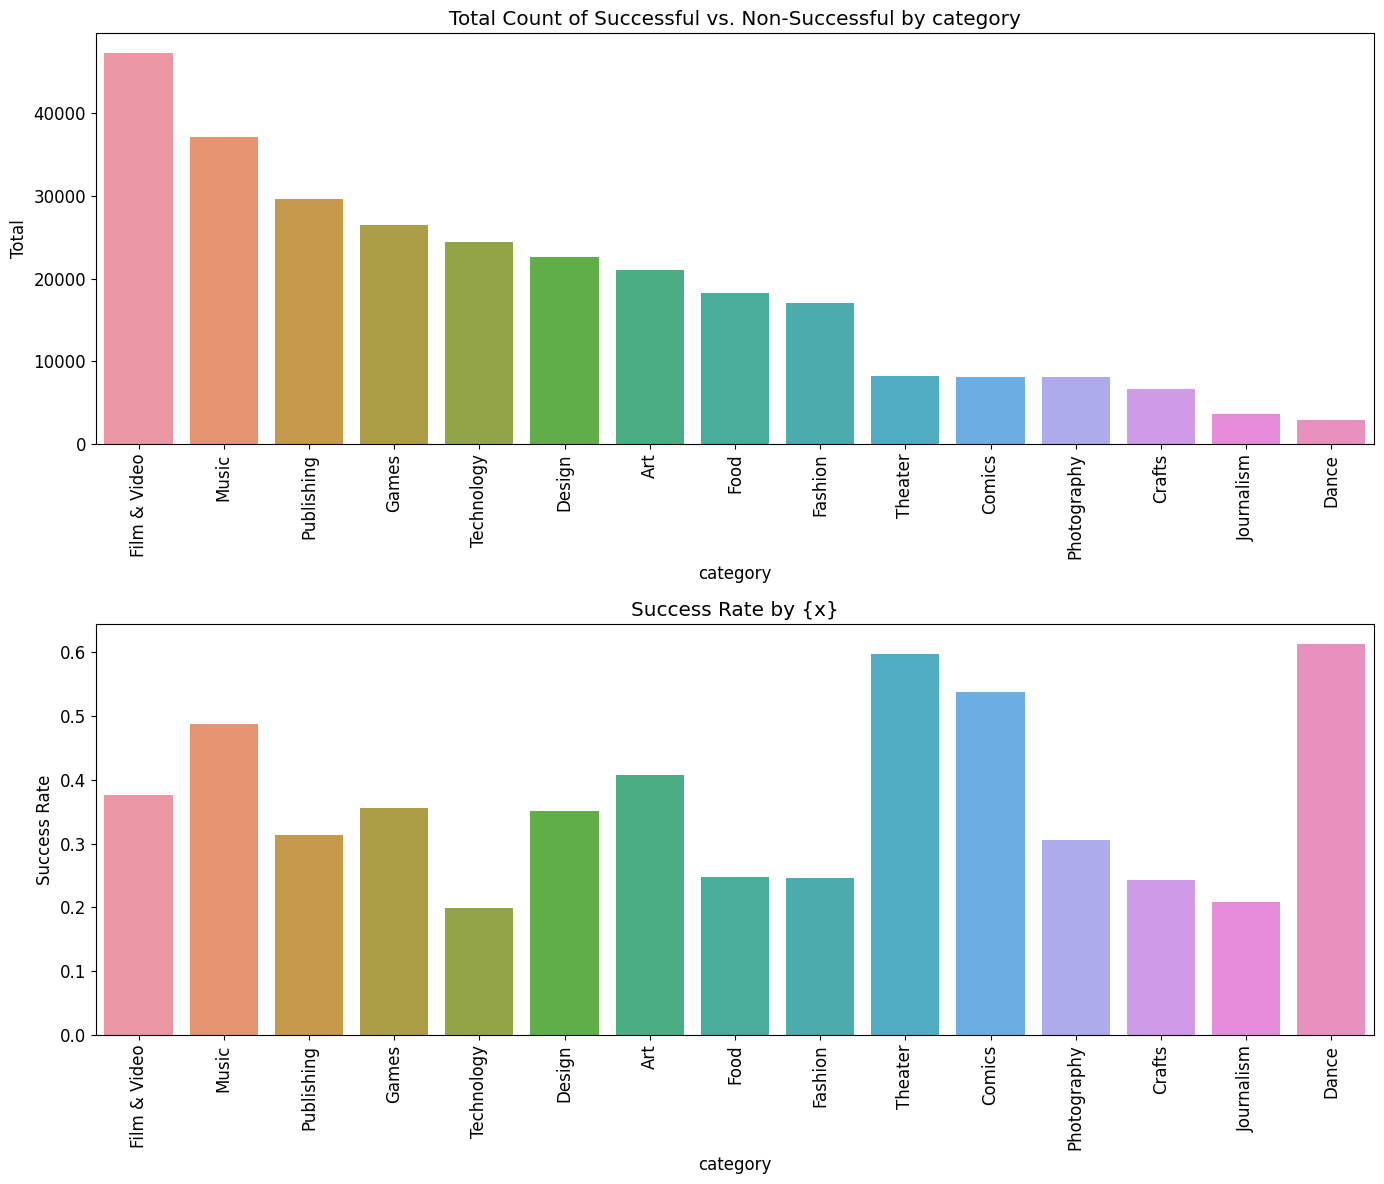

In [20]:
plot.bar_count_percent(df, 'category', 'state')

# Defining baseline model

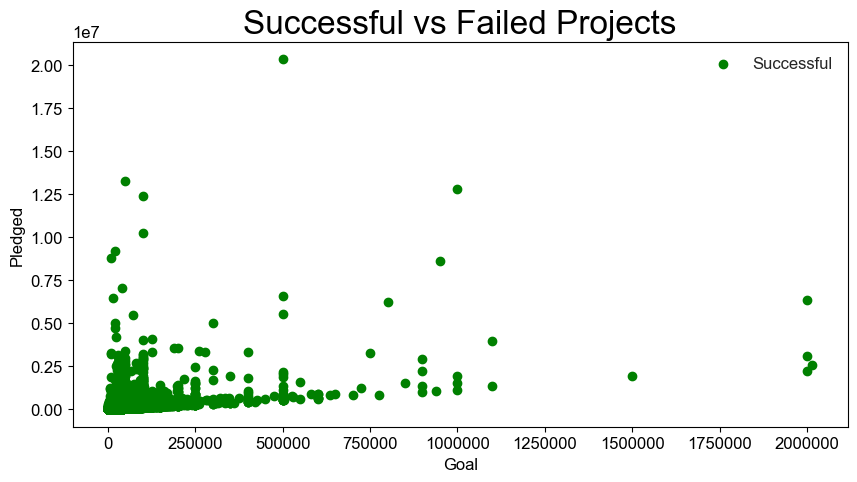

In [21]:
# Checking Goal of successful projects
df_success = df[df["state"] == 'Successful']
df_fail = df[df["state"] == 'Failed']
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(x = df_success.goal, y = df_success.pledged, marker = 'o', color='green', label = 'Successful')
#ax.scatter(x = df_fail.goal, y = df_fail.pledged, marker = 'x', color='red', label = 'Fail')
ax.set_title(label='Successful vs Failed Projects',fontsize=24)


ax.set_xlabel(xlabel = "Goal")
ax.set_ylabel(ylabel = "Pledged")
plt.style.use('seaborn-v0_8-darkgrid')

# Set the x-axis limit from 0 to 100,000
#ax.set_xlim(0, 1000000)
ax.ticklabel_format(style='plain', axis='x')

plt.legend()

plt.show()

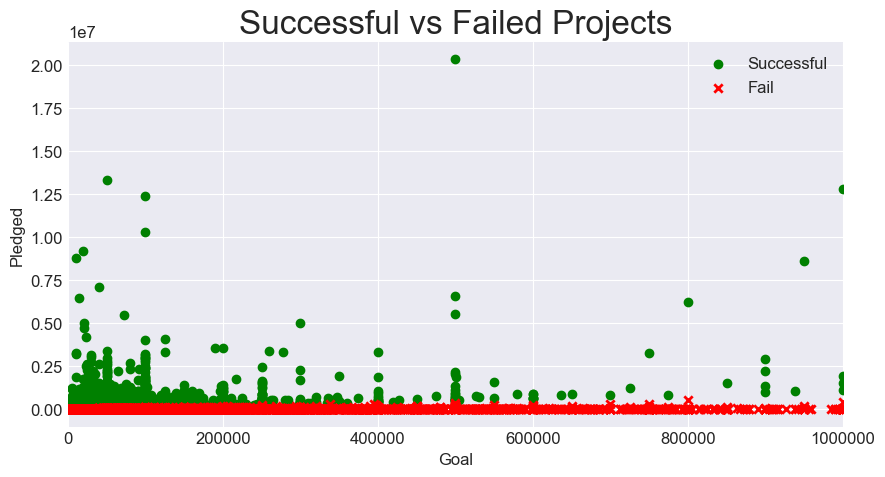

In [22]:
# As most successful project have a Goal under $1,000,000, checking failed and successful projects in this range
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(x = df_success.goal, y = df_success.pledged, marker = 'o', color='green', label = 'Successful')
ax.scatter(x = df_fail.goal, y = df_fail.pledged, marker = 'x', color='red', label = 'Fail')
ax.set_title(label='Successful vs Failed Projects',fontsize=24)


ax.set_xlabel(xlabel = "Goal")
ax.set_ylabel(ylabel = "Pledged")
plt.style.use('seaborn-v0_8-darkgrid')

# Set the x-axis limit from 0 to 100,000
ax.set_xlim(0, 1000000)
ax.ticklabel_format(style='plain', axis='x')

plt.legend()

plt.show()

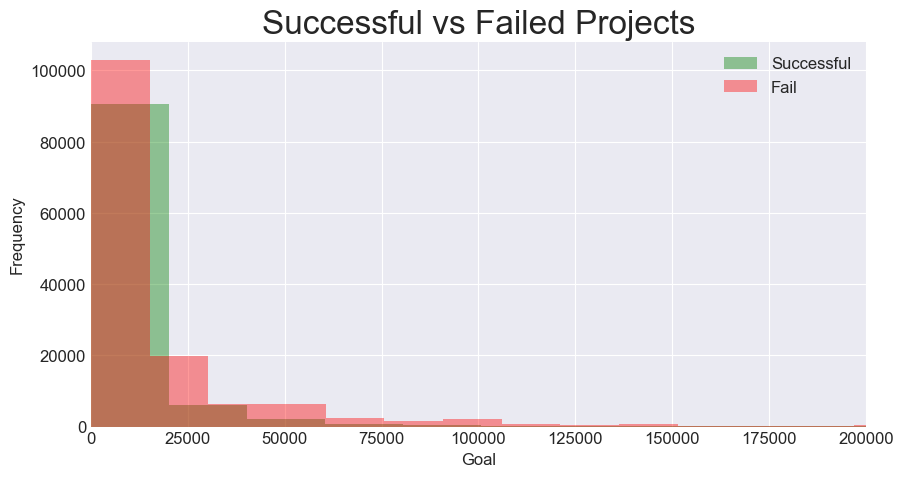

In [23]:
# Create histogram to check further the distribution between successful and failed projects
fig, ax = plt.subplots(figsize = (10,5))
ax.hist(df_success.goal, color='green', label = 'Successful', bins=100, alpha=0.4)
ax.hist(df_fail.goal, color='red', label = 'Fail', bins=10000, alpha=0.4)
ax.set_title(label='Successful vs Failed Projects',fontsize=24)

ax.set_xlabel(xlabel = "Goal")
ax.set_ylabel(ylabel = "Frequency")
plt.style.use('seaborn-v0_8-darkgrid')

# Set the x-axis limit from 0 to 100,000
ax.set_xlim(0, 200000)
ax.ticklabel_format(style='plain', axis='x')

plt.legend()

plt.show()

As we can see above, most successful projects have a Goal below $20,000.
Let's check further the categories and countries of successful and failed projects under $20,000

In [24]:
#Checking most successful countries
df_under_20k = df.query("goal <= 20000 and state in ('Successful', 'Failed')")
df_under_20k.shape

# Create crosstab 
crosstab = pd.crosstab(index=df_under_20k['country'], columns=df_under_20k['state'], values=df_under_20k['state'], aggfunc='count', dropna=False).fillna(0)

# Calculate success rate
crosstab['Success Rate'] = round(crosstab['Successful'] / (crosstab['Successful'] + crosstab['Failed']),2)

print(crosstab)

successful_countries = crosstab[crosstab['Success Rate'] > 0.35].index.to_list()
successful_countries



state           Failed  Successful  Success Rate
country                                         
Australia         2521        1376          0.35
Austria            171          61          0.26
Belgium            193          95          0.33
Canada            4602        2812          0.38
Denmark            313         240          0.43
France             749         565          0.43
Germany           1211         584          0.33
Hong Kong          133         127          0.49
Ireland            263         132          0.33
Italy              867         283          0.25
Japan                8           4          0.33
Luxembourg          16          12          0.43
Mexico             698         290          0.29
Netherlands        859         383          0.31
New Zealand        477         302          0.39
Norway             245         111          0.31
Singapore          161         112          0.41
Spain              722         309          0.30
Sweden             5

['Canada',
 'Denmark',
 'France',
 'Hong Kong',
 'Luxembourg',
 'New Zealand',
 'Singapore',
 'Sweden',
 'United Kingdom',
 'United States']

In [25]:
# Checking most successful categories
# Create crosstab 
crosstab = pd.crosstab(index=df_under_20k['category'], columns=df_under_20k['state'], values=df_under_20k['state'], aggfunc='count', dropna=False).fillna(0)

# Calculate success rate
crosstab['Success Rate'] = round(crosstab['Successful'] / (crosstab['Successful'] + crosstab['Failed']),2)

print(crosstab)

successful_categories = crosstab[crosstab['Success Rate'] > 0.35].index.to_list()
successful_categories

state         Failed  Successful  Success Rate
category                                      
Art             9212        8321          0.47
Comics          2678        4134          0.61
Crafts          3856        1565          0.29
Dance            835        1708          0.67
Design          7063        6315          0.47
Fashion         8642        3745          0.30
Film & Video   17426       15586          0.47
Food            7773        3835          0.33
Games           8426        8085          0.49
Journalism      1907         679          0.26
Music          14377       17453          0.55
Photography     4228        2308          0.35
Publishing     15088        8861          0.37
Technology      7955        3140          0.28
Theater         2294        4724          0.67


['Art',
 'Comics',
 'Dance',
 'Design',
 'Film & Video',
 'Games',
 'Music',
 'Publishing',
 'Theater']

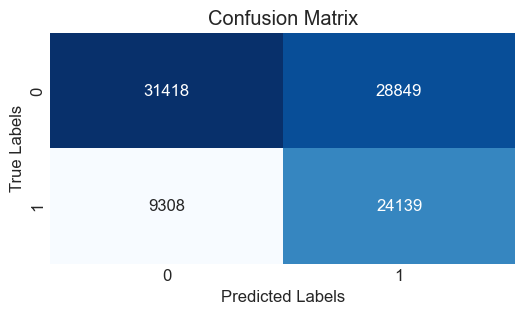

--------------------------------------------------------------------------------
Accuracy Score :  0.59 , Recall Score :  0.72 , F1 Score :  0.56
--------------------------------------------------------------------------------



----------------  Classification Report  ----------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.52      0.62     60267
           1       0.46      0.72      0.56     33447

    accuracy                           0.59     93714
   macro avg       0.61      0.62      0.59     93714
weighted avg       0.66      0.59      0.60     93714



In [26]:
# Defining Baseline model
def baseline_model(df:pd.DataFrame):
    """Edugated guess"""
    y_pred = [1 if row['goal'] <= 20000 and row['country'] in successful_countries and row['category'] in successful_categories else 0 for index, row in df.iterrows()]
    return y_pred

X_train, X_test, y_train, y_test = split_train_test(data, 'state')
y_test = (y_test == 'Successful').astype(int)
y_pred = baseline_model(X_test)

plot.visualise_evaluation_metrics(y_test, y_pred)

In [27]:
# Defining Simpler Baseline model
def baseline_model_goal(df:pd.DataFrame):
    """Edugated guess"""
    y_pred = [1 if row['goal'] <= 20000 else 0 for index, row in df.iterrows()]
    return y_pred

# Defining Baseline model
def baseline_model_category(df:pd.DataFrame):
    """Edugated guess"""
    y_pred = [1 if row['category'] in successful_categories else 0 for index, row in df.iterrows()]
    return y_pred

# Defining Baseline model
def baseline_model_country(df:pd.DataFrame):
    """Edugated guess"""
    y_pred = [1 if row['country'] in successful_countries else 0 for index, row in df.iterrows()]
    return y_pred

y_pred_goal = baseline_model_goal(X_test)
y_pred_category = baseline_model_category(X_test)
y_pred_country = baseline_model_country(X_test)


                      Name  Accuracy Score  Recall Score  F1 Score
0           baseline_model            0.59          0.72      0.56
1      baseline_model_goal            0.49          0.90      0.56
2  baseline_model_category            0.51          0.82      0.54
3   baseline_model_country            0.39          0.96      0.53


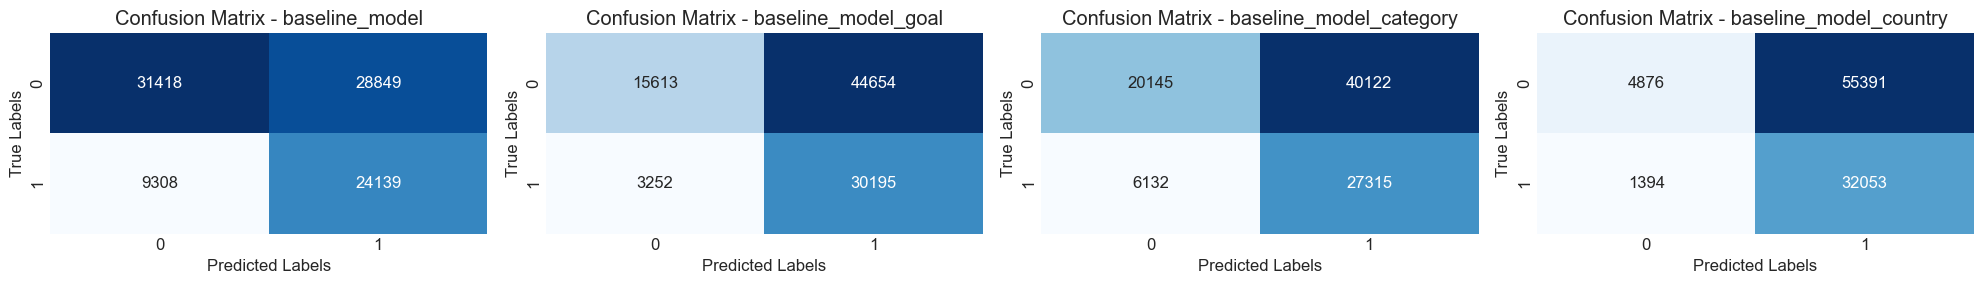

In [28]:
# Test function
models = []
models.append({"name": "baseline_model", "y_pred": y_pred})
models.append({"name": "baseline_model_goal", "y_pred": y_pred_goal})
models.append({"name": "baseline_model_category", "y_pred": y_pred_category})
models.append({"name": "baseline_model_country", "y_pred": y_pred_country})

plot.visualise_evaluation_metrics_multiple(models, y_test)
